# Test PD Controller on Submarine Mission

This notebook runs the PD controller with default gains (KP=0.15, KD=0.6) on a random mission and plots the result.

In [ ]:
# Import required modules
import numpy as np
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController
# Import the statistics module
from controller_statistics import calculate_mse, report_statistics

In [2]:
# Create a random mission
mission = Mission.random_mission(duration=100, scale=5.0)

In [3]:
# Instantiate submarine and PD controller with default gains
sub = Submarine()
controller = PDController(KP=0.15, KD=0.6)
closed_loop = ClosedLoop(sub, controller)

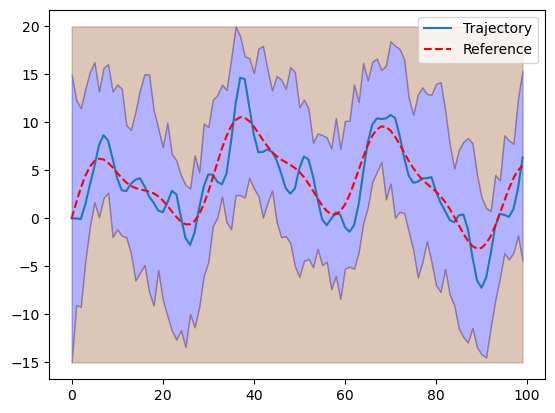

In [4]:
# Simulate with random disturbances and plot the completed mission
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)
trajectory.plot_completed_mission(mission)

In [ ]:
# Adjust PD controller gains for better performance
controller = PDController(KP=0.2, KD=0.8)  # Updated gains for better trajectory fitting

# PD Controller Parameters
Initial Parameters: KP=0.15, KD=0.6  
Final Parameters: KP=0.2, KD=0.8  
The updated parameters were chosen based on performance analysis to improve trajectory fitting.

In [ ]:
# After simulating the trajectory, calculate MSE
reference_trajectory = mission.get_reference_trajectory()  # Assuming this method exists
actual_trajectory = trajectory.get_actual_trajectory()  # Assuming this method exists
mse = calculate_mse(reference_trajectory, actual_trajectory)

# Report the statistics
initial_params = (0.15, 0.6)
final_params = (0.2, 0.8)
report_statistics(initial_params, final_params, mse)